In [1]:
K = Knot([[[1,-2,3,-1,2,-3]],[1,1,1]])

In [2]:
K

Knot represented by 3 crossings

In [3]:
G = K.fundamental_group()

In [4]:
G

Finitely presented group < x0, x1, x2 | x2*x1*x2^-1*x0^-1, x1*x0*x1^-1*x2^-1, x0*x2*x0^-1*x1^-1 >

In [5]:
S = SymmetricGroup(3)

In [6]:
Gg = G._gap_()
Gg

<fp group on the generators [ x0, x1, x2 ]>

In [7]:
Sg = S._gap_()
Sg

SymmetricGroup( [ 1 .. 3 ] )

In [8]:
Gg.GQuotients(Sg)

[ [ x0, x1, x2 ] -> [ (1,3), (2,3), (1,2) ] ]

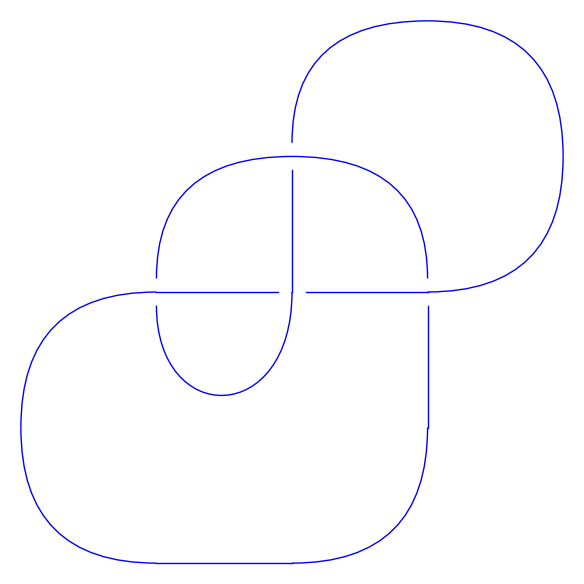

In [9]:
B = BraidGroup(3)
b = B([1,-2,1,-2])
K4 = Knot(b)
K4.plot()

In [10]:
G4 = K4.fundamental_group()
G4g = G4._gap_()

In [11]:
G4g.GQuotients(Sg)

[  ]

In [52]:
def colorings(K, n):
    gauss_code = K.oriented_gauss_code()
    crossing_list=gauss_code[0][0]
    negative_indices = [i for i in range(len(crossing_list)) if crossing_list[i]<0]
    gens = [crossing_list[negative_indices[i]:negative_indices[i+1]+1] for i in range(len(negative_indices)-1)]
    gens.append(crossing_list[negative_indices[-1]:]+crossing_list[:negative_indices[0]+1])
    m = len(gens)
    M = matrix(IntegerModRing(n), m, m)
    for cros in range(len(gauss_code[1])):
        gi = [g for g in gens if cros+1 in g][0]
        gj = [g for g in gens if -(cros+1)==g[-1]][0]
        giind = gens.index(gi)
        gjind = gens.index(gj)
        gkind = gjind + 1
        if gkind >= len(gens):
            gkind = 0
        M[cros,giind] = 2
        M[cros, gjind] = -1
        M[cros, gkind] = -1
    solutions =  M.kernel().list()
    return [s for s in solutions if len(set(s))>1]

In [53]:
colorings(K,3)

[(1, 0, 2), (2, 0, 1), (0, 1, 2), (2, 1, 0), (0, 2, 1), (1, 2, 0)]

In [54]:
colorings(K4,5)

[(1, 0, 2, 3),
 (2, 0, 4, 1),
 (3, 0, 1, 4),
 (4, 0, 3, 2),
 (0, 1, 4, 3),
 (2, 1, 3, 4),
 (3, 1, 0, 2),
 (4, 1, 2, 0),
 (0, 2, 3, 1),
 (1, 2, 0, 4),
 (3, 2, 4, 0),
 (4, 2, 1, 3),
 (0, 3, 2, 4),
 (1, 3, 4, 2),
 (2, 3, 1, 0),
 (4, 3, 0, 1),
 (0, 4, 1, 2),
 (1, 4, 3, 0),
 (2, 4, 0, 3),
 (3, 4, 2, 1)]

In [40]:
set(_[0])

{0}

In [30]:
colorings(K4,3)

0

In [31]:
colorings(K4,5)

1

In [23]:
M = is_coloreable(K4,5)
M

[4 4 0 2]
[4 0 2 4]
[0 2 4 4]
[2 4 4 0]

In [24]:
M.delete_columns([0]).delete_rows([0]).determinant()

0

In [25]:
M.nullity()

2

In [32]:
M

[4 4 0 2]
[4 0 2 4]
[0 2 4 4]
[2 4 4 0]

In [33]:
M.kernel()

Vector space of degree 4 and dimension 2 over Ring of integers modulo 5
Basis matrix:
[1 0 2 3]
[0 1 4 3]

In [34]:
_.list()

[(0, 0, 0, 0),
 (1, 0, 2, 3),
 (2, 0, 4, 1),
 (3, 0, 1, 4),
 (4, 0, 3, 2),
 (0, 1, 4, 3),
 (1, 1, 1, 1),
 (2, 1, 3, 4),
 (3, 1, 0, 2),
 (4, 1, 2, 0),
 (0, 2, 3, 1),
 (1, 2, 0, 4),
 (2, 2, 2, 2),
 (3, 2, 4, 0),
 (4, 2, 1, 3),
 (0, 3, 2, 4),
 (1, 3, 4, 2),
 (2, 3, 1, 0),
 (3, 3, 3, 3),
 (4, 3, 0, 1),
 (0, 4, 1, 2),
 (1, 4, 3, 0),
 (2, 4, 0, 3),
 (3, 4, 2, 1),
 (4, 4, 4, 4)]

In [55]:
G = Graph()

In [56]:
G.characteristic_polynomial?